<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# **1. Relational Graph**

In [52]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
         Age Category  Living With Spouse & At Least One Child In Household  \
year                                                                          
2024        Sub-Total                                             271800      
2023        Sub-Total                                             243700      
2022        Sub-Total                                             255800      
2021        Sub-Total                                             221800      
2020        Sub-Total                                             214600      
...               ...                                                ...      
2014  85 Years & Over                                               5700      
2013  85 Years & Over                                               5100      
2012  85 Years & Over                                               4800      
2011  85 Years & Over                                               4000      
2010  85 Years & Over        

In [58]:
# Prepare Residents Data
# Keep only year and total residents aged 65+
df_residents = df_residents_65plus.reset_index()[['year', 'Total']].copy()
df_residents['Total'] = pd.to_numeric(df_residents['Total'], errors='coerce')

# Group by year
df_residents = df_residents.groupby('year', as_index=False)['Total'].sum()
df_residents = df_residents.rename(columns={'Total': 'Residents65Plus'})

# Prepare Nursing Home Data
# Sum total number of beds by year
df_nursinghome_beds = df_nursinghome.reset_index().groupby('year', as_index=False)['no_beds'].sum()
df_nursinghome_beds = df_nursinghome_beds.rename(columns={'no_beds': 'NursingHomeBeds'})

# Merge both datasets by year
df_merge = pd.merge(df_residents, df_nursinghome_beds, on='year', how='inner')

In [54]:
# Relational Graph (Scatter Plot with Regression Line)
# Showing the correlation how the number of nursing home beds relates to number of elderly residents (65+).

# Define plotting function
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds", s=100)
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    for _, row in df.iterrows():
        plt.text(row["Residents65Plus"], row["NursingHomeBeds"], str(row["year"]),
                 fontsize=8, ha='right', va='bottom')

    # Add Title and Labels
    plt.title("Relation: Elderly Residents (65+) vs Nursing Home Beds (Singapore)")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

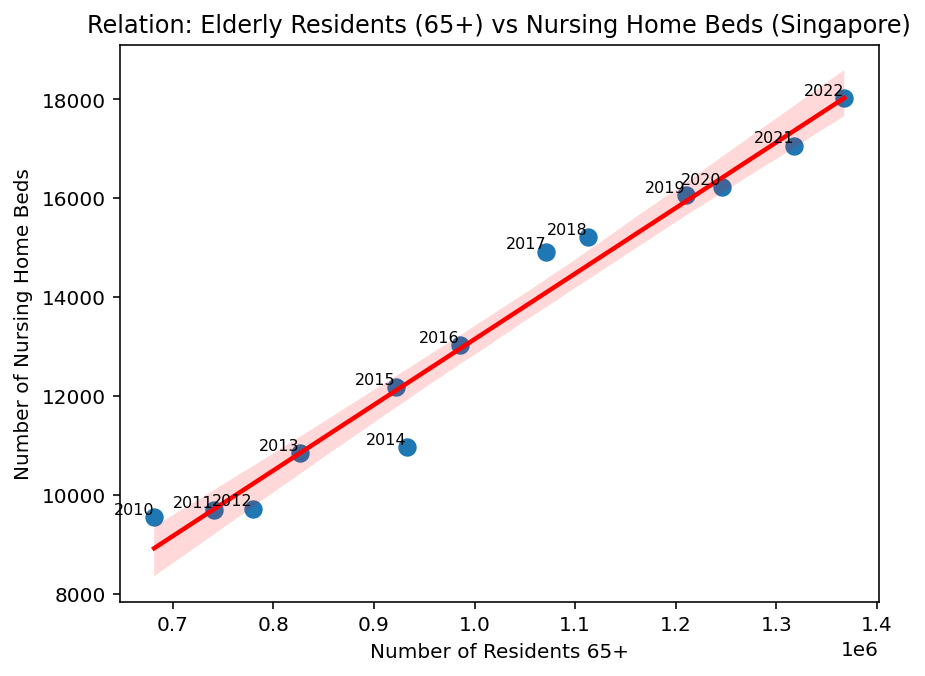

In [77]:
# General correlation between elderly residents (65+) and available nursing home beds.
# Call the plotting function
plot_relational(df_merge)

In [56]:
# Display the merged dataset for verification
print("\nMerged Dataset (for plotting):")
print(df_merge)


Merged Dataset (for plotting):
    year  Residents65Plus  NursingHomeBeds
0   2010           681500             9551
1   2011           740600             9690
2   2012           779700             9721
3   2013           826200            10838
4   2014           932700            10968
5   2015           921900            12185
6   2016           985400            13022
7   2017          1071200            14918
8   2018          1112600            15205
9   2019          1210000            16059
10  2020          1245900            16221
11  2021          1317800            17064
12  2022          1367600            18029


# **2. Categorical Graph**

In [99]:
print("Dataset Preview:")
print(df_residents.head())

Dataset Preview:
   year Age Category  Living With Spouse & At Least One Child In Household  \
0  2024    Sub-Total                                             271800      
1  2023    Sub-Total                                             243700      
2  2022    Sub-Total                                             255800      
3  2021    Sub-Total                                             221800      
4  2020    Sub-Total                                             214600      

   Living With Spouse, No Children In Household  Living Alone In Household  \
0                                        208600                      87200   
1                                        197000                      78100   
2                                        173900                      78600   
3                                        186400                      64500   
4                                        164800                      63800   

   Living With Children But Without Spouse In

In [100]:
# Data Preparation
# Convert numeric columns to numbers (some are stored as strings)
cols_to_convert = [
    'Living With Spouse & At Least One Child In Household',
    'Living With Spouse, No Children In Household',
    'Living Alone In Household',
    'Living With Children But Without Spouse In Household',
    'Others',
    'Total'
]
df_residents[cols_to_convert] = df_residents[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Focus on Sub-Total rows (not specific age groups)
df_subtotal = df_residents[df_residents['Age Category'] == 'Sub-Total'].copy()

# --- Melt dataframe to long format for easy plotting ---
df_melted = df_subtotal.melt(
    id_vars=['year'],
    value_vars=[
        'Living With Spouse & At Least One Child In Household',
        'Living With Spouse, No Children In Household',
        'Living Alone In Household',
        'Living With Children But Without Spouse In Household',
        'Others'
    ],
    var_name='Living_Arrangement',
    value_name='Number_of_Residents'
)

In [101]:
print("\nTransformed Data for Categorical Plot:")
print(df_melted.head())


Transformed Data for Categorical Plot:
   year                                 Living_Arrangement  \
0  2024  Living With Spouse & At Least One Child In Hou...   
1  2023  Living With Spouse & At Least One Child In Hou...   
2  2022  Living With Spouse & At Least One Child In Hou...   
3  2021  Living With Spouse & At Least One Child In Hou...   
4  2020  Living With Spouse & At Least One Child In Hou...   

   Number_of_Residents  
0               271800  
1               243700  
2               255800  
3               221800  
4               214600  


In [102]:
# Function 1: Stacked Bar Chart
def plot_categorical_stacked_bar(df):
    """
    Categorical Graph: Stacked Bar Chart comparing living arrangements of elderly residents by year.
    """
    # Pivot data to make categories as columns
    df_pivot = df.pivot(index='year', columns='Living_Arrangement', values='Number_of_Residents')

    # Sort by year for correct order
    df_pivot = df_pivot.sort_index()

    # Plot stacked bar chart
    ax = df_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20',
        edgecolor='black'
    )

    plt.title("Stacked Bar Chart: Living Arrangements of Residents Aged 65+ by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Residents")
    plt.legend(title='Living Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

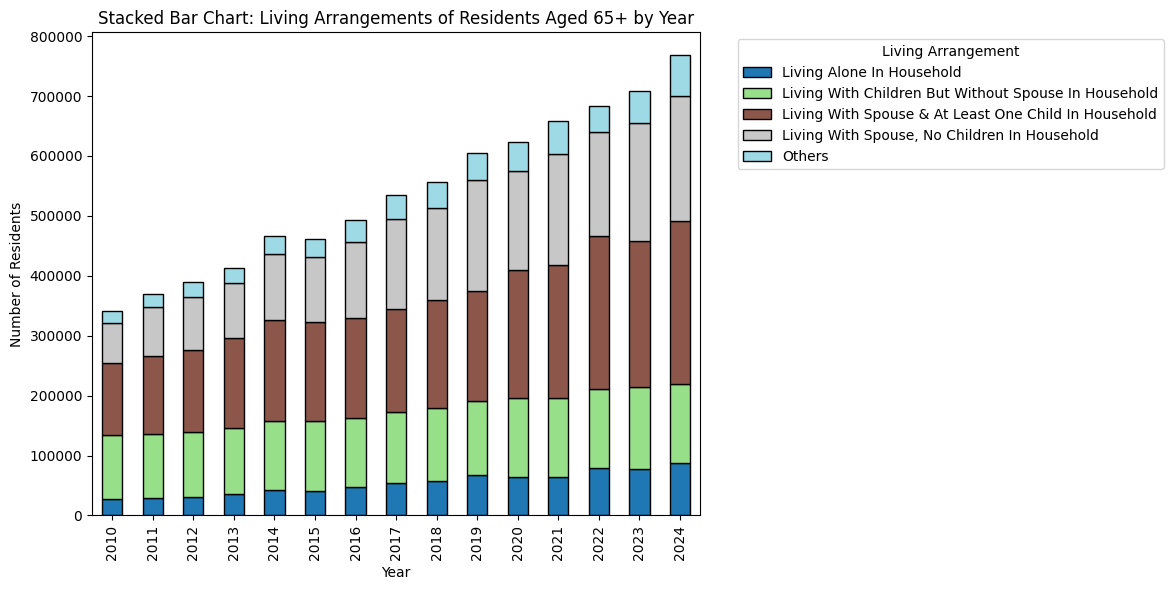

In [103]:
# Call the Functions
plot_categorical_stacked_bar(df_melted)

In [104]:
# Function 2: Boxplot (Distribution per Category)
def plot_categorical_box(df):
    """
    Categorical Graph: Boxplot comparing the distribution of residents by living arrangement.
    """
    plt.figure(figsize=(10, 6), dpi=144)
    sns.boxplot(data=df, x='Living_Arrangement', y='Number_of_Residents')
    plt.title("Distribution of Residents by Living Arrangement (Boxplot)")
    plt.xlabel("Living Arrangement")
    plt.ylabel("Number of Residents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


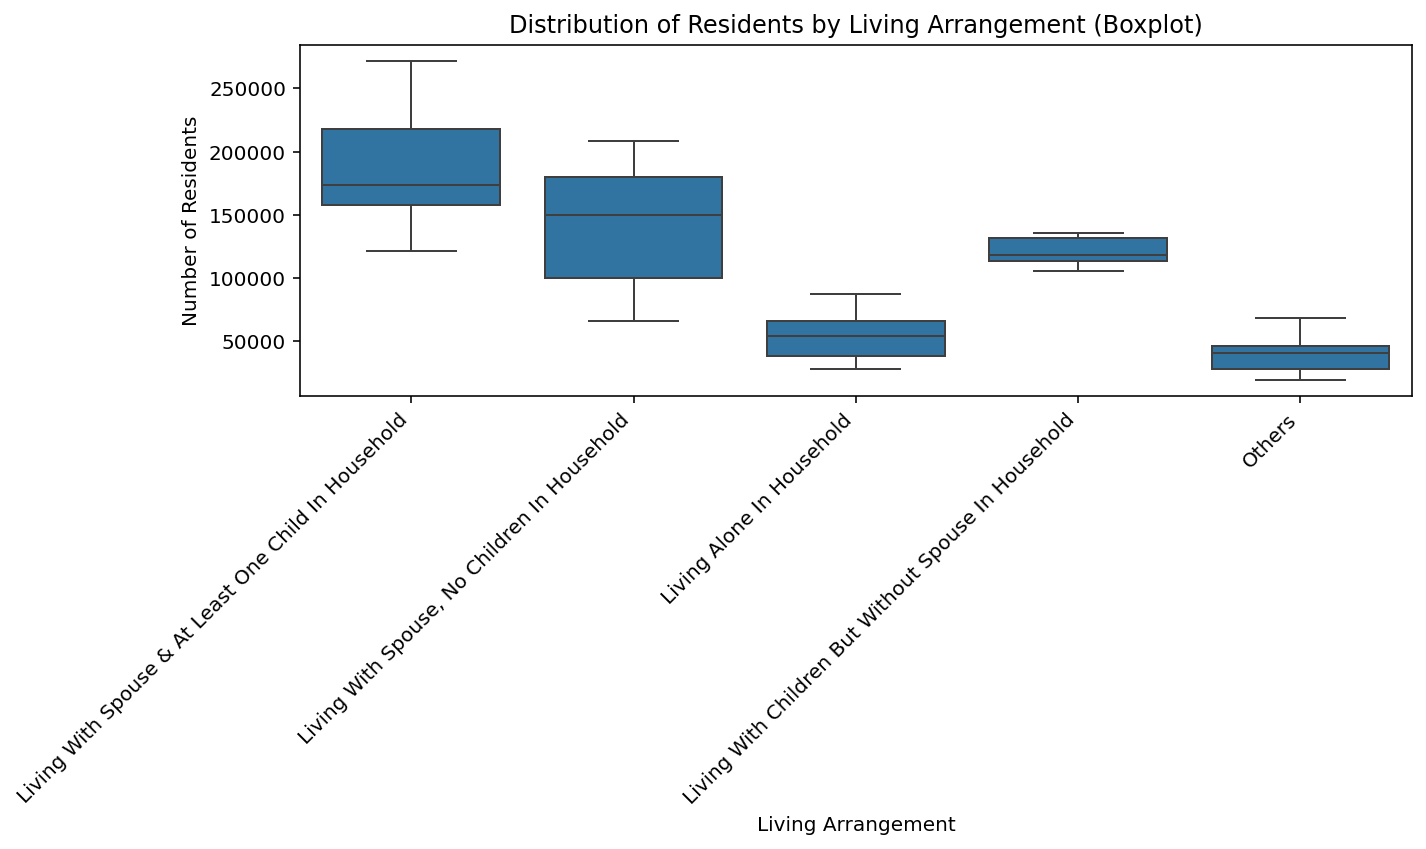

In [105]:
# Call the Functions
plot_categorical_box(df_melted)

# **3. Statistical Graph**